<a href="https://colab.research.google.com/github/t1seo/Python_Notebook/blob/master/effective_python/futures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 용어 정리

- 병렬성, 동시성
- Blocking, Non-blocking
- Synchronous, Asynchronous


- GIL
- 프로세스와 쓰레드
- `concrrent.futures` - 병렬 작업 실행하기
    - Mutithread, Multiprocess



- AsyncIO



## 동시성(Concurrency) vs 병렬성(Parallelism)
병렬성 혹은 동시성은 최대한 자원을 활용해서 여러개의 작업을 동시에 처리할 수 있게 해준다.

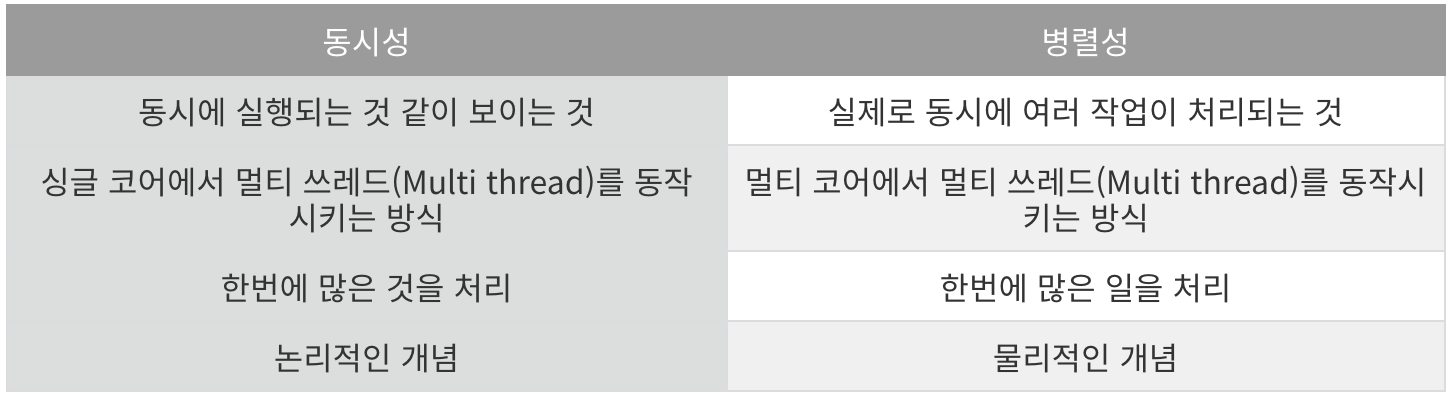


#### 참고 자료
- [동시성(Concurrency) vs 병렬성(Parallelism)](https://seamless.tistory.com/42)

## 동기와 비동기, 그리고 블럭과 넌블럭

- `비동기(asynchronous)`는 A → B → END 의 프로세스에서 A의 작업이 시작되면 끝날 때까지 기다리지 않고 B의 작업을 시작하는 것이다.
- 반면 `동기(synchronous)`는 A의 일이 끝나야만이 B의 일을 시작할 수 있다.
    
    



- `Blocking I/O` : 호출된 함수가 자신의 작업을 완료될 때까지 제어권을 가지고 있다. 그래서 다른 함수는 대기하고 있어야 한다.
- `Non-blocking I/O` : 호출된 함수(서브루틴)가 `return(yield)` 후 호출한 함수(메인 루틴)에 제어권을 전달한다. 그래서 다른 함수도 일을 할 수 있다.

#### 참고 자료
- [동기/비동기와 블로킹/논블로킹](https://deveric.tistory.com/99)
- [동기와 비동기, 그리고 블럭과 넌블럭](https://musma.github.io/2019/04/17/blocking-and-synchronous.html)
- [Blocking-NonBlocking-Synchronous-Asynchronous](http://homoefficio.github.io/2017/02/19/Blocking-NonBlocking-Synchronous-Asynchronous/)

## 프로세스와 쓰레드의 차이


#### 참고 자료
- [프로세스와 스레드의 차이](https://gmlwjd9405.github.io/2018/09/14/process-vs-thread.html)

## GIL
파이썬이 느린 이유 중 하나는 전역 인터프리터 락(Global Interpreter Lock, GIL) 때문이다.

파이썬 최초의 공식 구현체인 CPython은 개발 초기에 번거로운 동시성 관리를 편리하게 하고 쓰레드 세이프하지 않은 CPython의 메모리 관리를 쉽게 하기 위해, GIL로 파이썬 객체에 대한 접근을 제한하는 형태로 설계했다.
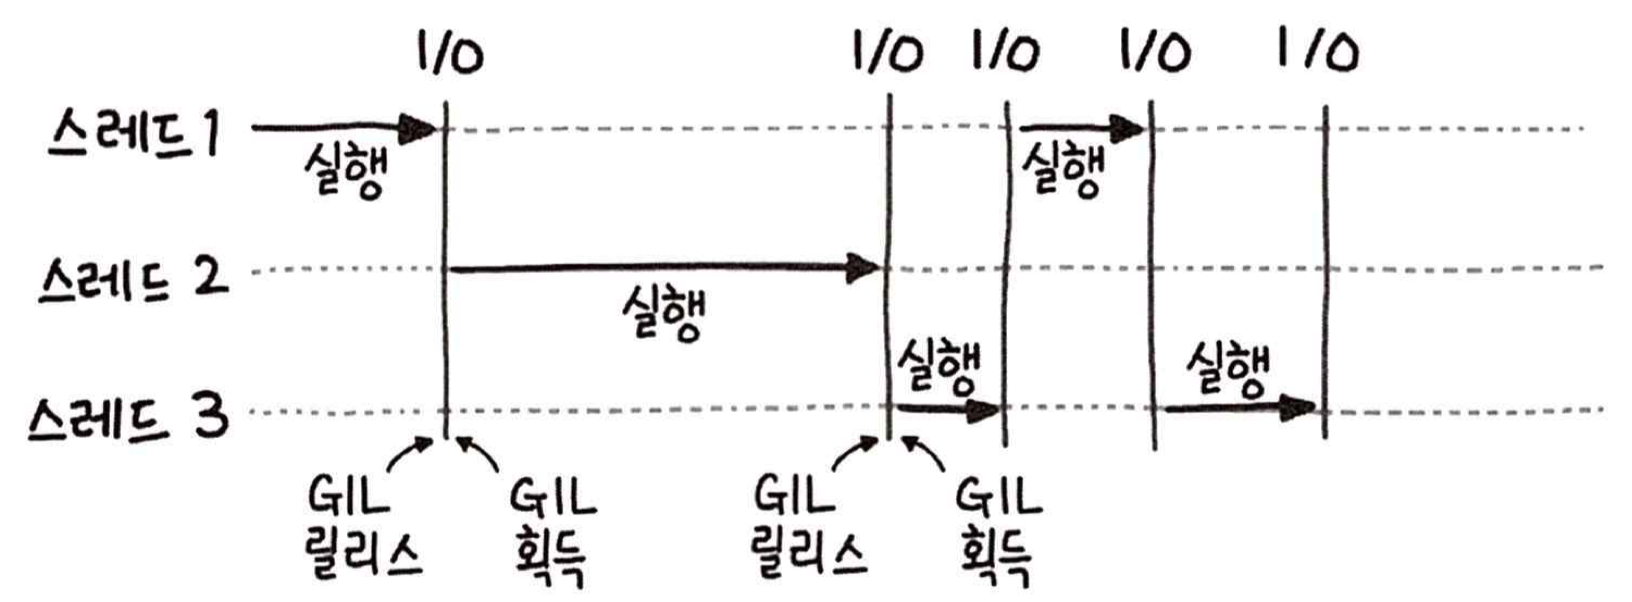


GIL은 Global Interpreter Lock의 약어로, 하나의 쓰레드가 자원을 독점하는 형태로 실행된다.

CPython 개발이 시작된 것이 1994년이고, 그 당시에는 CPU 코어가 하나던 당시에는 GIL 디자인이 문제가 없었다. 하지만 지금처럼 멀티 코어가 당여한 세상에서는 하나의 쓰레드가 자원을 독점하는 형태로 실행되는 제약은 매우 치명적이다.

최근들어 GIL을 극복하려는 시도가 있어왔지만 아직도 기능 대부분이 GIL에 의존하는 형태로 구현되어 있어 GIL은 파이썬의 주요 특징으로 남아있다.

- `GIL(Global Interface Lock)`은 여러개의 작업을 실행할 떄 전체가 락이 걸리는 현상을 말한다. 파이썬에만 있는 독특한 특징이다.
- 두 개 이상의 스레드가 동시에 실행 될 때 하나의 자원을 엑세스 하는 경우 문제점을 방지하기 위해 GIL이 실행된다. 즉, 리소스 전체가 락이 걸린다. 게다가 문맥 교환 비용이 든다.
- 서로 일한 것을 합치는 과정을 `문맥 교환(Context Switch)`이라 한다.
- 그래서 여러개의 쓰레드로 작업하면 오히려 하나만 쓸 때보다 느릴 때가 있다.
- 그래서 GIL을 우회하기 위해 멀티 프로세싱을 사용하고나 CPython을 사용한다.
- 결론은 파이썬에 GIL이라는 특징이 있기 떄문에 무조건 쓰레드를 많이 사용하는 것이 좋은 것이 아니다.

#### 참고 자료
- [python에서의 thread 동시성 문제 (feat. GIL, Global Interpreter Lock](https://wangin9.tistory.com/entry/pythonthreadGIL)

# concurrent.futures
- [concurrent.futures — 병렬 작업 실행하기](https://docs.python.org/ko/3/library/concurrent.futures.html)


**futures**
- `futures` : 비동기 실행을 위한 API를 고수준으로 작성하여 사용하기 쉽도록 개선한 것이 `futures`이다.
    - `threading`, `multiprocessing`을 wrapping 하였다.

**concurrent.futures**
1. 멀티스레딩/멀티프로세싱 API 통일 -> 매우 사용하기 쉬움
2. 실행중이 작업 취소, 완료 여부 체크, 타임아웃 옵션, 콜백추가, 동기화 코드 매우 쉽게 작성 -> Promise 개념

- `concurrent.futures` 모듈은 비동기적으로 콜러블을 실행하는 고수준 인터페이스를 제공합니다.
- 비동기 실행은 (`ThreadPoolExecutor`를 사용해서) 스레드나 (`ProcessPoolExecutor`를 사용해서) 별도의 프로세스로 수행 할 수 있습니다. 둘 다 추상 Executor 클래스로 정의된 것과 같은 인터페이스를 구현합니다.

## futures.ThreadPoolExecutor

In [ ]:
import os
import time
from concurrent import futures

# 동시에 4개의 worker에게 일을 시켜서 각각 1부터 합을 구한다
WORK_LIST = [100000, 1000000, 10000000, 100000000]

# 동시성 합계 게산 메인 함수 - 누적 합계 함수(제너레이터)
def sum_generator(n):
    return sum(n for n in range(1, n + 1))

# 진입점
def main():
    # Worker Count: worker 수를 10개 혹은 리스트의 원소 갯수 중 회소값으로 지정한다
    # worker = min(10, len(WORK_LIST)) # pattern

    start_tm = time.time() # 시작 시간

    # MultiThread
    with futures.ThreadPoolExecutor(max_workers=worker) as executor:
        result = executor.map(sum_generator, WORK_LIST) # map -> 작업 순서 유지, 즉시 실행
    
    end_tm = time.time() - start_tm # 종료 시간
    
    msg = '\n Result: {} Time : {:.2f}s' # 출력 포멧
    print(msg.format(list(result), end_tm)) # 최종 결과

if __name__ == "__main__":
    main()


## futures.ProcessPoolExecutor

In [ ]:
import os
import time
from concurrent import futures

# 동시에 4개의 worker에게 일을 시켜서 각각 1부터 합을 구한다
WORK_LIST = [100000, 1000000, 10000000, 100000000]

# 동시성 합계 게산 메인 함수 - 누적 합계 함수(제너레이터)
def sum_generator(n):
    return sum(n for n in range(1, n + 1))

# 진입점
def main():
    # Worker Count: worker 수를 10개 혹은 리스트의 원소 갯수 중 회소값으로 지정한다
    worker = min(10, len(WORK_LIST)) # pattern

    start_tm = time.time() # 시작 시간

    # MultiProcess
    with futures.ProcessPoolExecutor(max_workers=worker) as executor:
        result = executor.map(sum_generator, WORK_LIST) # map -> 작업 순서 유지, 즉시 실행
    
    end_tm = time.time() - start_tm # 종료 시간
    
    msg = '\n Result: {} Time : {:.2f}s' # 출력 포멧
    print(msg.format(list(result), end_tm)) # 최종 결과

if __name__ == "__main__":
    main()


## futures.wait

In [ ]:
WORK_LIST = [100000, 1000000, 10000000, 10000000]

# wait
def main():
    worker = min(10, len(WORK_LIST))  # Worker 카운트
    start_tm = time.time()  # 시작 시간
    futures_list = []  # future

    # ProcessPoolExecutor
    with futures.ThreadPoolExecutor() as excutor:
        for work in WORK_LIST:
            # future 반환(아직 실행되지 않는다. 미래에 할일을 반환할 뿐이다)
            future = excutor.submit(sum_generator, work)

            # 스케쥴링(4개의 일을 담는다)
            futures_list.append(future)

            # 스케쥴링 확인
            print('Scheduled for {} : {}'.format(work, future))

        print()

        # wait 결과 출력
        result = futures.wait(futures_list, timeout=7)  # 7초까지 기다려주고 7초안에 끝내지 못하면 실패한 애들은 중단

        print('Completed Tasks : ' + str(result.done))  # 성공 task 출력
        print()
        print('Pending ones after waiting for 7 seconds : ' +
              str(result.not_done))  # 실패 task 출력
        print()
        print('Result : ', end="")
        print([future.result() for future in result.done])  # 결과 출력

    end_tm = time.time() - start_tm  # 종료 시간
    msg = '\n Time : {:.2f}s'  # 출력 포맷
    print(msg.format(end_tm))  # 최종 결과 출력


# 실행
if __name__ == '__main__':
    main()

## futures.as_completed

In [ ]:
WORK_LIST = [10000000, 1000000, 10000, 10000000]

# as_completed
def main():
    worker = min(10, len(WORK_LIST))  # Worker 카운트
    start_tm = time.time()  # 시작 시간
    futures_list = []  # future

    # ProcessPoolExecutor
    with futures.ThreadPoolExecutor() as excutor:
        for work in WORK_LIST:
            # future 반환(아직 실행되지 않는다. 미래에 할일을 반환할 뿐이다)
            future = excutor.submit(sum_generator, work)

            # 스케쥴링(4개의 일을 담는다)
            futures_list.append(future)

            # 스케쥴링 확인
            print('Scheduled for {} : {}'.format(work, future))

        # as_completed: 먼저 끝난 것 먼저 반환
        for future in futures.as_completed(futures_list):
            result = future.result()  # 결과
            done = future.done()  # 끝났는지
            cancelled = future.cancelled  # 취소 됐는지

            # future 결과 확인
            print('Future Result : {}, Done : {}'.format(result, done))  # 완료
            print('Future Cancelled : {}'.format(cancelled))  # 취소
        print()

    end_tm = time.time() - start_tm  # 종료 시간
    msg = '\n Time : {:.2f}s'  # 출력 포맷
    print(msg.format(end_tm))  # 최종 결과 출력


# 실행
if __name__ == '__main__':
    main()

# AsyncIO

asyncio는 async/await 구문을 사용하여 동시성 코드를 작성하는 라이브러리입니다.

- [asyncio — 비동기 I/O](https://docs.python.org/ko/3/library/asyncio.html)
- `AsyncIO`는 코루틴에서 확장되어 만들어진 패키지이다.
    - `asyncio`는 `async/await` 구문을 사용하여 동시성 코드를 작성하는 라이브러리입니다.
    - 비동기 I/O을 Coroutine 으로 쉽게 작업하게 해준다.
    - `Non-blocking` 비동기 처리를 해준다.

- [Python Requests non-blocking?](https://stackoverflow.com/questions/14245989/python-requests-non-blocking)
    - Like `urllib2`, `requests` is blocking.
    - 사용하는 함수가 blocking이면 `asyncio`를 사용하는 것보다 단일 쓰레드를 사용하는 것이 더 빠르다.
        - 쓰레드의 단점 : 디버깅 어려움, 지원 접근 시 레이스 컨디션(경쟁상태), 데드락(dead lock)

- 내가 사용하는 함수가 비동기로 구현되어야 `asyncio`를 사용할 수 있다.

AsyncIO 설치
```
pip install asyncio
```

In [ ]:
!pip install asyncio

In [ ]:
!pip install nest_asyncio

In [ ]:
# aiohttp 권장
import asyncio
import timeit
from urllib.request import urlopen
from concurrent.futures import ThreadPoolExecutor
import threading


import nest_asyncio
nest_asyncio.apply()

In [ ]:
# 실행 시작 시간
start = timeit.default_timer()

# 서비스 방향이 비슷한 사이트로 실습 권장(예 : 게시판성 커뮤니티)
urls = ['http://daum.net', 'https://naver.com', 'http://mlbpark.donga.com/',
        'https://tistory.com', 'https://wemakeprice.com/']

In [ ]:
# fetch 함수
async def fetch(url, executor):
    # 쓰레드명 출력
    print('Thread Name :',
          threading.current_thread().getName(), 'Start', url)  # 디버깅용 코드

    # 실행
    res = await loop.run_in_executor(executor, urlopen, url)
    print('Thread Name :',
          threading.current_thread().getName(), 'Done', url)  # 디버깅용 코드

    # 결과 반환
    return res.read()[0:5]  # 각 사이트의 시작하는 5글자만 가져온다

In [ ]:
# 실행
res = await loop.run_in_executor(executor, urlopen, url)